In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from pandas.api.types import CategoricalDtype

import math
from collections import Counter
from scipy import stats

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

import statsmodels.api as sm
from statsmodels.formula.api import ols   # To perform ANOVA

# f - To find F-statistic for ANOVA
from scipy.stats import chi2_contingency, chi2, f

# Loading Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Variable identification

__SalePrice__ is the target variable and the rest are the __predcitor variable__.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Determining count of different data types columns

In [5]:
print("Number of numerical data types: ", len(train.select_dtypes(include = 'number').columns))
print("Number of boolean data types: ", len(train.select_dtypes(include = 'bool').columns))
print("Number of object data types: ", len(train.select_dtypes(include = 'object').columns))

Number of numerical data types:  38
Number of boolean data types:  0
Number of object data types:  43


### rbinding train and test data

In [6]:
sale_price_df = train[['SalePrice']]

In [7]:
data = pd.concat([train.drop(columns='SalePrice'), test], axis = 0)
data.shape

(2919, 80)

#### Some of the non-numeric predictors are stored as numbers; convert them into strings 

In [8]:
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

### Creating new features

In [9]:
data['Yrs_since_remodel'] = data['YearRemodAdd'] - data['YearBuilt']
data['House_Qual'] = data['OverallQual'] + data['OverallCond']
data['Total_bathrooms'] = data['BsmtFullBath'] + data['BsmtHalfBath'] + data['FullBath'] + data['HalfBath']
data['Total_basement_SF'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['TotalBsmtSF']
data['Total_sqr_footage'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']


data['Has_Garage'] = np.where(data['GarageArea']>0,1,0)
data['Has_2ndFlr'] = np.where(data['2ndFlrSF']>0,1,0)
data['Has_Pool'] = np.where(data['PoolArea']>0 , 1, 0)
data['Has_basement'] = np.where(data['Total_basement_SF'] > 0, 1, 0)
data['Has_fireplace'] = np.where(data['Fireplaces']>0,1,0)
data['Has_wooddeck'] = np.where(data['WoodDeckSF']>0,1,0)
data['Has_Open_Porch'] = np.where(data['OpenPorchSF']>0,1,0)
data['Has_EnclosedPorch'] = np.where(data['EnclosedPorch']>0,1,0)
data['Has_3SsnPorch'] = np.where(data['3SsnPorch']>0,1,0)
data['Has_ScreenPorch'] = np.where(data['ScreenPorch']>0,1,0)

In [10]:
data.shape

(2919, 95)

In [11]:
train = data.iloc[:len(train),:].copy()
test = data.iloc[len(train):,:].copy()
train = pd.concat([train,sale_price_df['SalePrice']], axis = 1)

In [12]:
train.shape

(1460, 96)

In [13]:
test.shape

(1459, 95)

# 2.1 Univariate Analysis of numerical variables



## SalePrice

Trying to fit the SalePricedistribution and trying to fit it to any of the standard distribution

#### Normal distribution

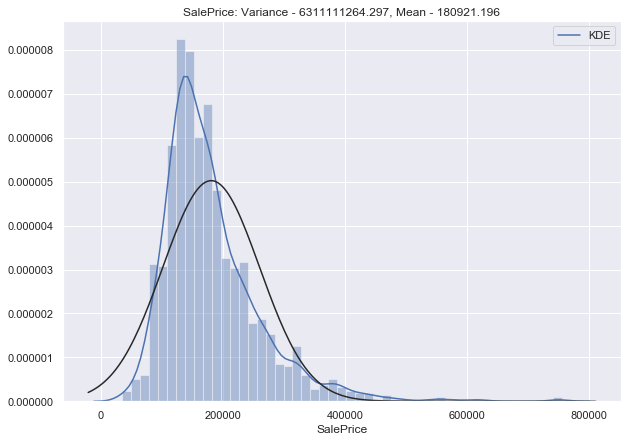

In [15]:
from scipy.stats import norm, johnsonsu, johnsonsb, lognorm
plt.figure(figsize=(10,7));
sns.distplot(train['SalePrice'], kde = True, fit=norm, kde_kws = {"label":"KDE"},
            fit_kws = {"label":"Normal"});
plt.title('SalePrice: Variance - {:.3f}, Mean - {:.3f}'.format(train['SalePrice'].var(), train['SalePrice'].mean()));

#### Lognorm distribution

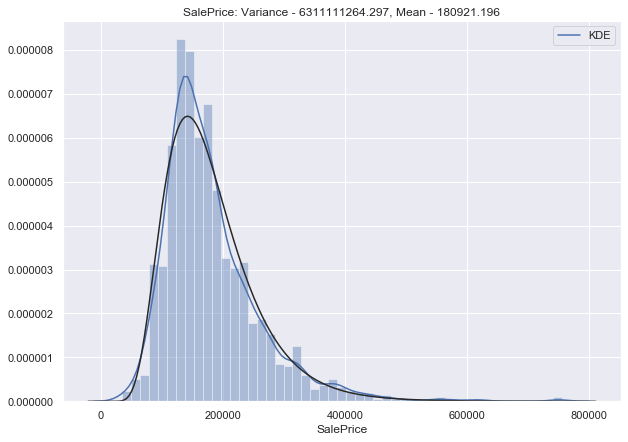

In [16]:
plt.figure(figsize=(10,7));
sns.distplot(train['SalePrice'], kde = True, fit=lognorm, kde_kws = {"label":"KDE"});
plt.title('SalePrice: Variance - {:.3f}, Mean - {:.3f}'.format(train['SalePrice'].var(), train['SalePrice'].mean()));

#### johnsonsu distribution

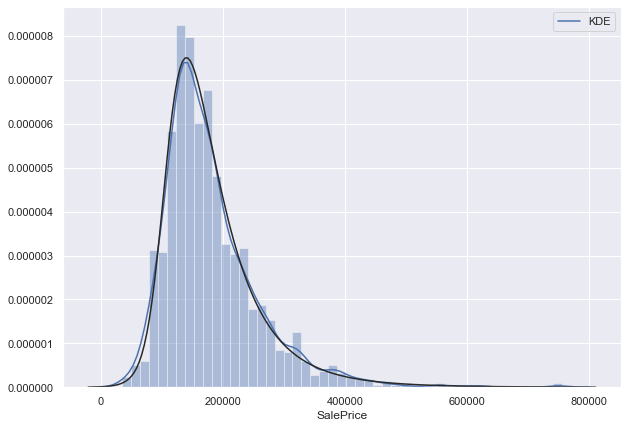

In [17]:
plt.figure(figsize=(10,7));
sns.distplot(train['SalePrice'], kde = True, fit=johnsonsu, kde_kws = {"label":"KDE"});

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

IMP Reference: [Transforming data to a normal distribution](https://www.sigmamagic.com/blogs/how-do-i-transform-data-to-normal-distribution/)

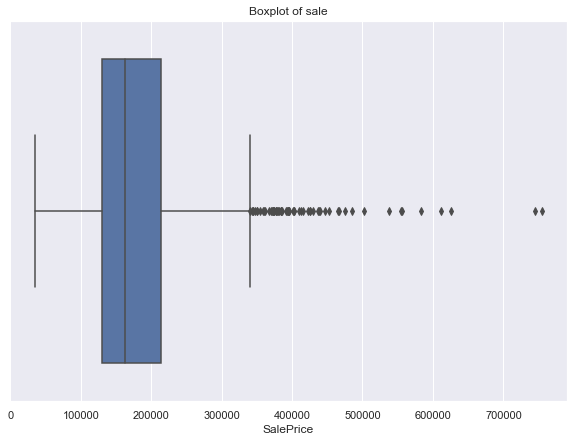

In [20]:
plt.figure(figsize = (10,7));
sns.boxplot(train['SalePrice']);
plt.title('Boxplot of sale');

In [21]:
train.select_dtypes(include = 'number').columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Yrs_since_remodel', 'House_Qual', 'Total_bathrooms',
       'Total_basement_SF', 'Total_sqr_footage', 'Has_Garage', 'Has_2ndFlr',
       'Has_Pool', 'Has_basement', 'Has_fireplace', 'Has_wooddeck',
       'Has_Open_Porch', 'Has_EnclosedPorch', 'Has_3SsnPorch',
       'Has_ScreenPorch', 'SalePrice'],
      dtype='object')

#### Yrs_since_remodel

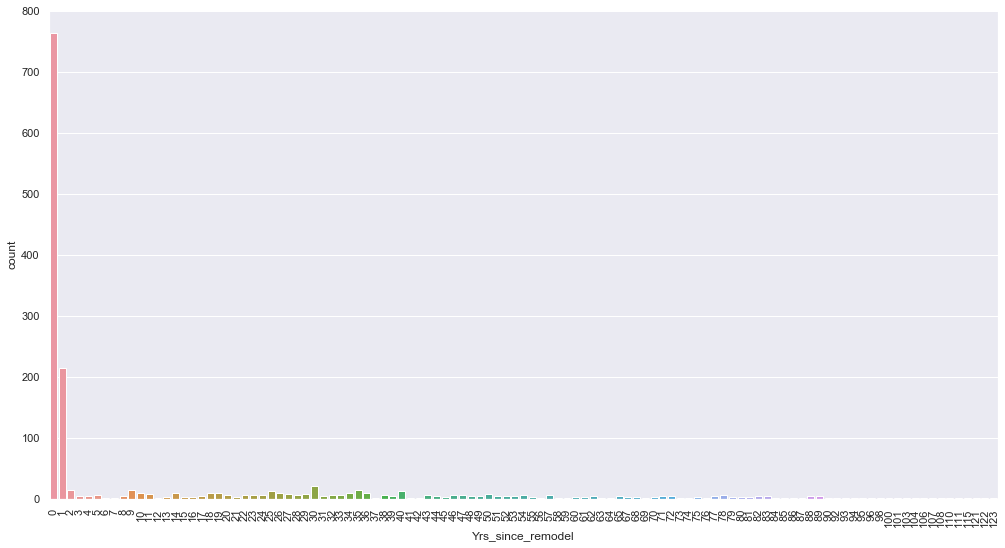

In [22]:
plt.figure(figsize=(17,9));
sns.countplot(data = train, x = 'Yrs_since_remodel');
plt.xticks(rotation=90);

In [23]:
len(train['Yrs_since_remodel'][train['Yrs_since_remodel']>0])

696

#### MSSubClass

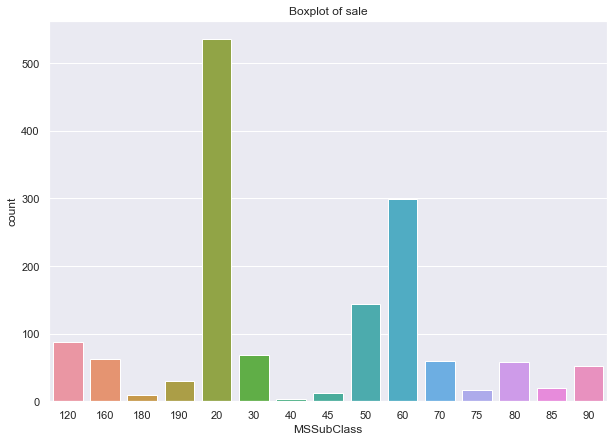

In [24]:
plt.figure(figsize = (10,7));
sns.countplot(data = train, x = 'MSSubClass');
plt.title('Boxplot of sale');

Most of the sale happened of the __1946 and New style buildings/houses__.

#### LotFrontage

In [25]:
train['LotFrontage'].isnull().sum()

259

In [26]:
test['LotFrontage'].isnull().sum()

227

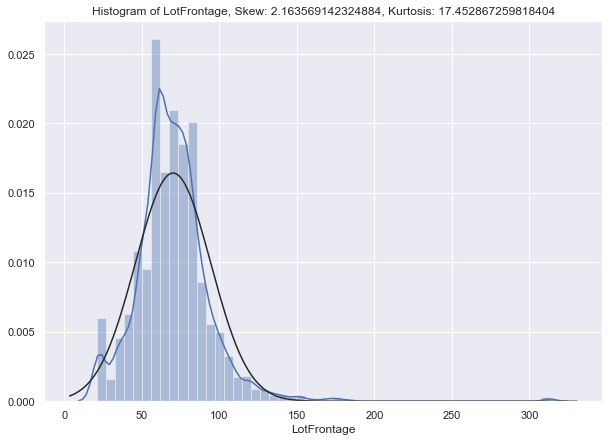

In [27]:
plt.figure(figsize = (10,7));
sns.distplot(train['LotFrontage'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('LotFrontage', train['LotFrontage'].skew(), 
                                                           train['LotFrontage'].kurt()));

#### LotArea

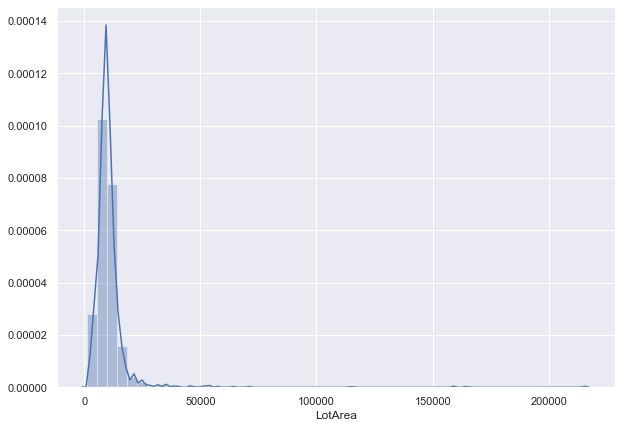

In [28]:
plt.figure(figsize = (10,7));
sns.distplot(train['LotArea']);

#### OverallQual

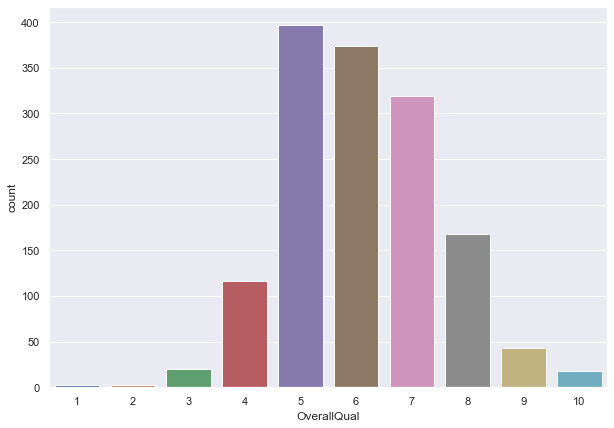

In [29]:
plt.figure(figsize=(10,7));
sns.countplot(data=train, x = 'OverallQual');

Most of the Sales happened of that of houses having a decent value of OverallQual i.e, between 4 and 8.

#### OverallCond

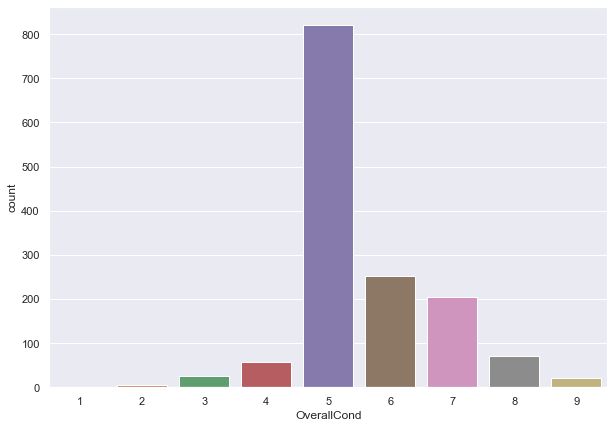

In [30]:
plt.figure(figsize=(10,7));
sns.countplot(data=train, x = 'OverallCond');

#### House_Qual

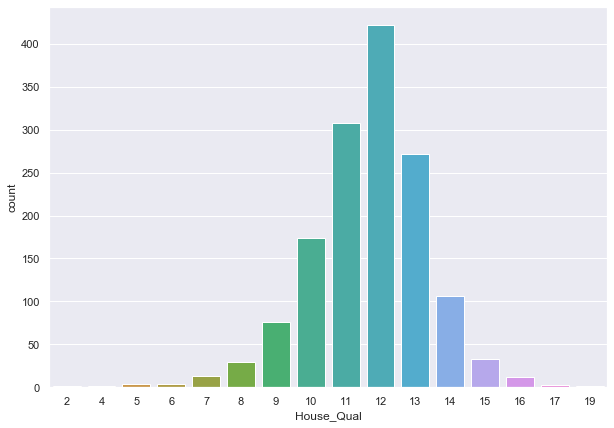

In [31]:
plt.figure(figsize=(10,7));
sns.countplot(data=train, x = 'House_Qual');

#### YearBuilt

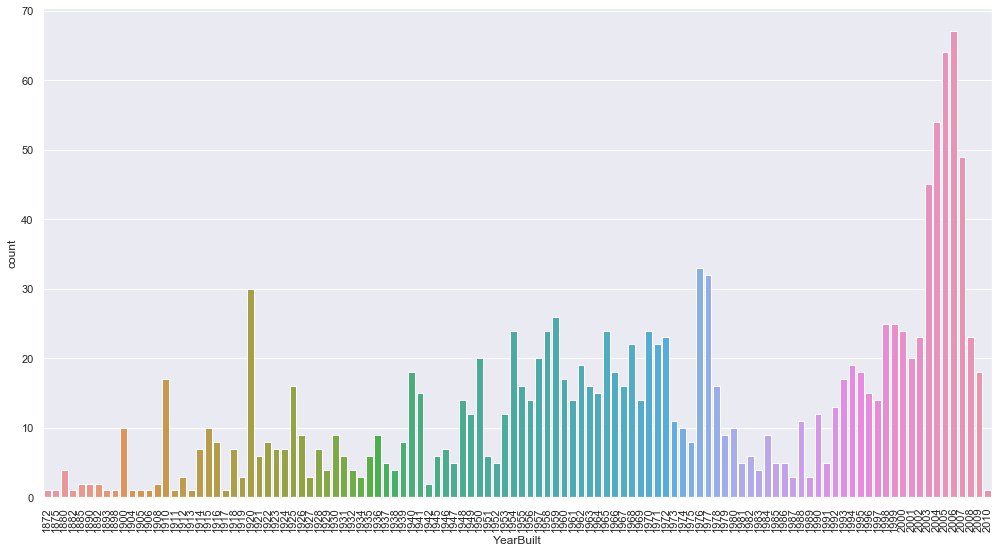

In [32]:
plt.figure(figsize=(17,9));
sns.countplot(data = train, x = 'YearBuilt');
plt.xticks(rotation=90);

Most of the houses were sold were built recently.

#### YearRemodAdd

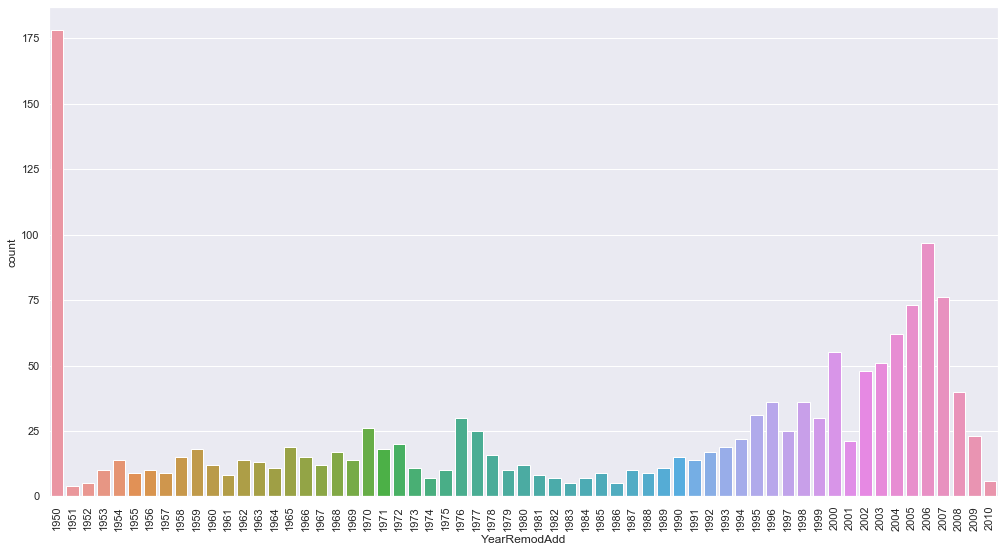

In [33]:
plt.figure(figsize=(17,9));
sns.countplot(data = train, x = 'YearRemodAdd');
plt.xticks(rotation=90);

Most of the houses which were remodelled in 1950 and then sold.

#### MasVnrArea


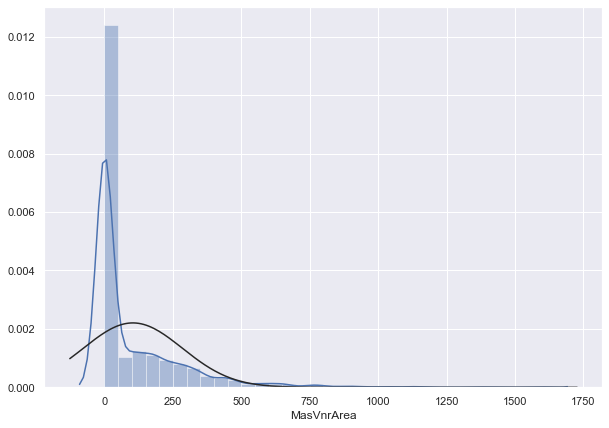

In [34]:
plt.figure(figsize = (10,7));
sns.distplot(train['MasVnrArea'], fit = norm, bins = np.arange(train['MasVnrArea'].min(), train['MasVnrArea'].max(),50));

Most of the houses have 0 Masonry area.

#### BsmtFinSF1

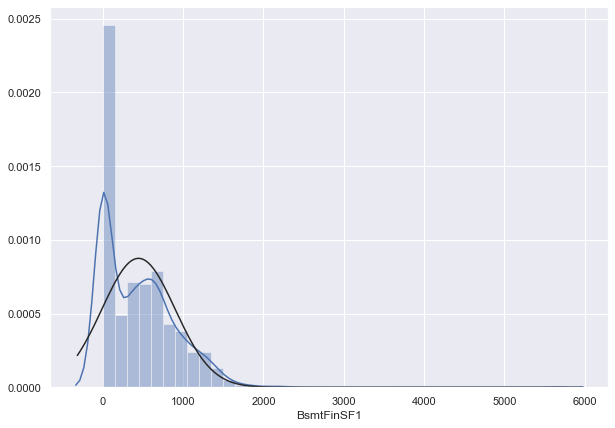

In [39]:
plt.figure(figsize = (10,7));
sns.distplot(train['BsmtFinSF1'], fit = norm, bins = np.arange(train['BsmtFinSF1'].min(), train['BsmtFinSF1'].max(),150));

#### Total_basement_SF

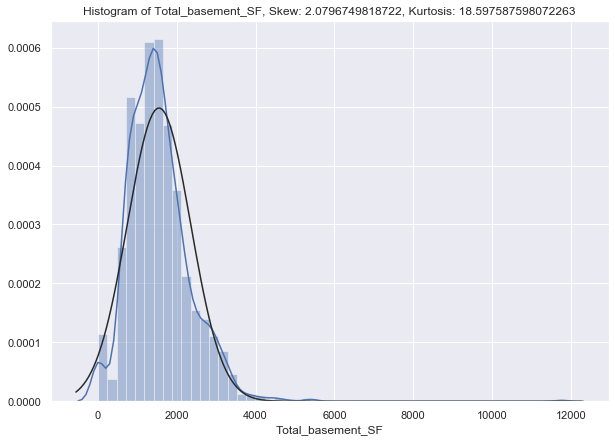

In [40]:
plt.figure(figsize = (10,7));
sns.distplot(train['Total_basement_SF'], fit = norm);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('Total_basement_SF', train['Total_basement_SF'].skew(), 
                                                           train['Total_basement_SF'].kurt()));

Most of the Sales have happened of house having 0 BsmtFinSF1 - Type 1 square feet.

#### BsmtFinSF2

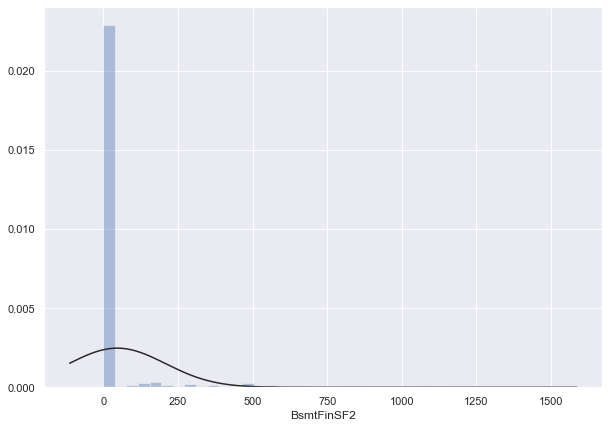

In [41]:
plt.figure(figsize = (10,7));
sns.distplot(train['BsmtFinSF2'], fit = norm, kde = False)

In [42]:
train['BsmtFinSF2'].unique()

array([   0.,   32.,  668.,  486.,   93.,  491.,  506.,  712.,  362.,
         41.,  169.,  869.,  150.,  670.,   28., 1080.,  181.,  768.,
        215.,  374.,  208.,  441.,  184.,  279.,  306.,  180.,  580.,
        690.,  692.,  228.,  125., 1063.,  620.,  175.,  820., 1474.,
        264.,  479.,  147.,  232.,  380.,  544.,  294.,  258.,  121.,
        391.,  531.,  344.,  539.,  713.,  210.,  311., 1120.,  165.,
        532.,   96.,  495.,  174., 1127.,  139.,  202.,  645.,  123.,
        551.,  219.,  606.,  612.,  480.,  182.,  132.,  336.,  468.,
        287.,   35.,  499.,  723.,  119.,   40.,  117.,  239.,   80.,
        472.,   64., 1057.,  127.,  630.,  128.,  377.,  764.,  345.,
       1085.,  435.,  823.,  500.,  290.,  324.,  634.,  411.,  841.,
       1061.,  466.,  396.,  354.,  149.,  193.,  273.,  465.,  400.,
        682.,  557.,  230.,  106.,  791.,  240.,  547.,  469.,  177.,
        108.,  600.,  492.,  211.,  168., 1031.,  438.,  375.,  144.,
         81.,  906.,

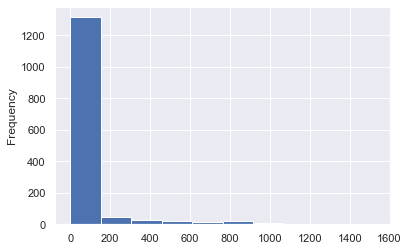

In [43]:
test['BsmtFinSF2'].plot(kind='hist');

Here most of the values of BsmtFinSF2 (Type 2 finished square feet) are zero this implies most of the houses have zero type 2 basement.

> As more than half of the data in both train and test set are zero so we will drop this column. But better to o it after getting correlation value and then delete it with proof.

#### BsmtUnfSF

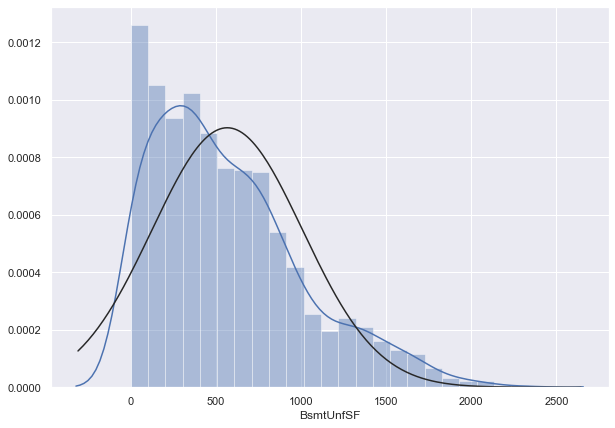

In [44]:
plt.figure(figsize = (10,7));
sns.distplot(train['BsmtUnfSF'], fit = norm, kde = True);

BsmtUnfSF - Most of the houses have less than 1000 square feet area of work pending.

#### TotalBsmtSF

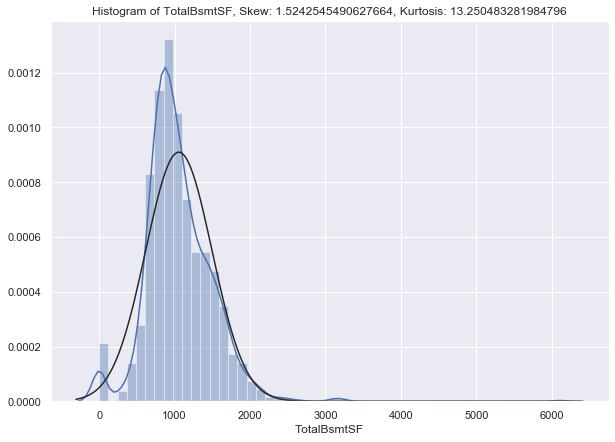

In [45]:
plt.figure(figsize = (10,7));
sns.distplot(train['TotalBsmtSF'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('TotalBsmtSF', train['TotalBsmtSF'].skew(), 
                                                           train['TotalBsmtSF'].kurt()));

Most of the houses have TotalBsmtSF close to 1000 sq feet.

#### 1stFlrSF



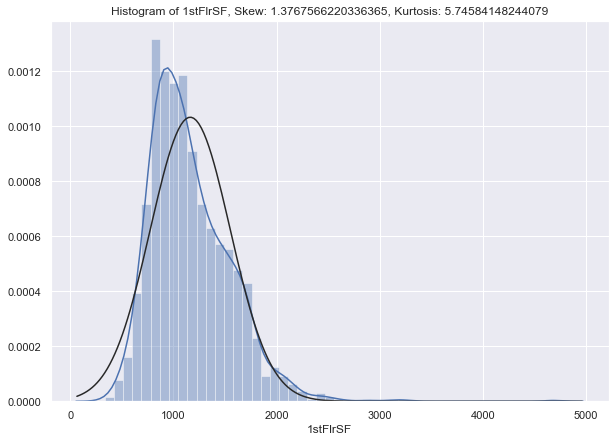

In [46]:
plt.figure(figsize = (10,7));
sns.distplot(train['1stFlrSF'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('1stFlrSF', train['1stFlrSF'].skew(), 
                                                           train['1stFlrSF'].kurt()));

Similarly,

#### 2ndFlrSF

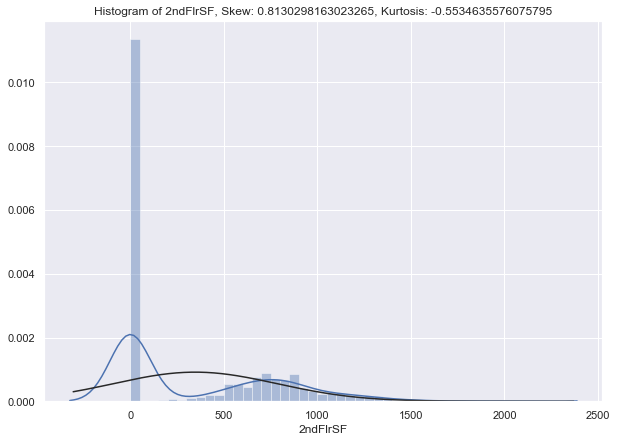

In [48]:
plt.figure(figsize = (10,7));
sns.distplot(train['2ndFlrSF'], fit = norm, kde = True, 
             bins = np.arange(train['MasVnrArea'].min(), train['2ndFlrSF'].max(),50));
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('2ndFlrSF', train['2ndFlrSF'].skew(), 
                                                           train['2ndFlrSF'].kurt()));


> As can be seen most of the houses do not have 2nd floor so zero 2nd floor SF area. So better 3 columns: `2ndFlrSF + 1stFlrSF + TotalBsmtSF = TotalSF` also more the TotalSF more the SalePrice.  (+ve relationship)
So after creating this new column we can drop the 3 columns: __2ndFlrSF,1stFlrSF,TotalBsmtSF__. And the column __TotalSF__ can then be transformed.

Also,

> There can be a negative relationship with SalePrice and BsmtUnfSF. (-ve relationship)



#### LowQualFinSF

In [49]:
test['LowQualFinSF'].isnull().sum()

0

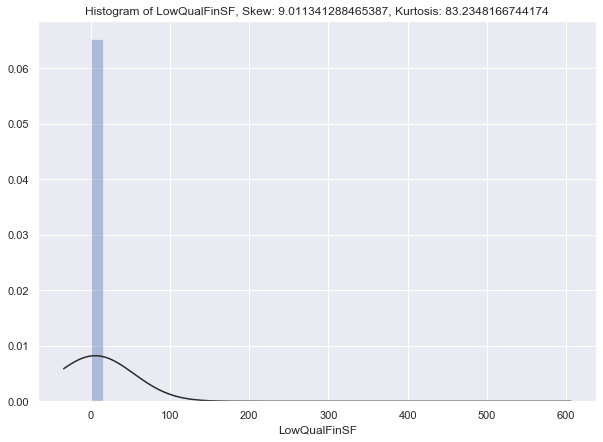

In [50]:
plt.figure(figsize = (10,7));
sns.distplot(train['LowQualFinSF'], fit = norm, kde = False);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('LowQualFinSF', train['LowQualFinSF'].skew(), 
                                                           train['LowQualFinSF'].kurt()));

In [42]:
train['LowQualFinSF'].value_counts()[:5]

0      1434
80        3
360       2
528       1
53        1
Name: LowQualFinSF, dtype: int64

> So more than half of these columns values are zero so this column can be dropped as we cannot decipher any particular relationship of this column with SalePrice or any column.

#### GrLivArea

In [51]:
test['GrLivArea'].isnull().sum()

0

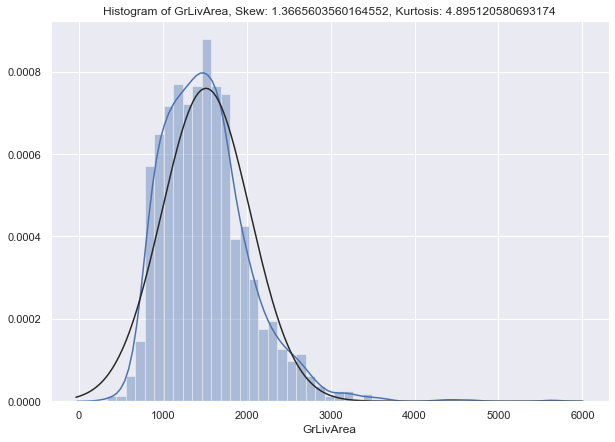

In [52]:
plt.figure(figsize = (10,7));
sns.distplot(train['GrLivArea'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('GrLivArea', train['GrLivArea'].skew(), 
                                                           train['GrLivArea'].kurt()));

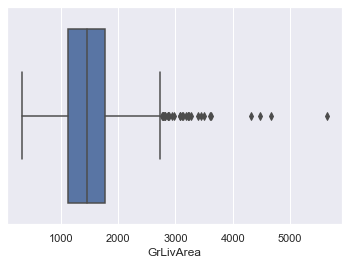

In [53]:
sns.boxplot(data = train, x = 'GrLivArea');

Although the kde almost coincides with the normal distribution. But kurtosis is high due to presence of outliers need to check this after outliers are removed.

#### BsmtFullBath

In [54]:
train['BsmtFullBath'].isnull().sum()

0

In [55]:
test['BsmtFullBath'].isnull().sum()

2

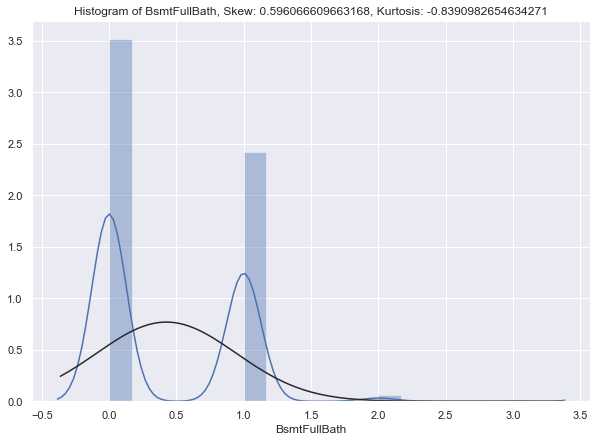

In [56]:
plt.figure(figsize = (10,7));
sns.distplot(train['BsmtFullBath'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('BsmtFullBath', train['BsmtFullBath'].skew(), 
                                                           train['BsmtFullBath'].kurt()));

In [57]:
train['BsmtFullBath'].value_counts(dropna = False)

0.0    856
1.0    588
2.0     15
3.0      1
Name: BsmtFullBath, dtype: int64

It gives the count of full bathrooms in the Basement. Might be necessary as number of full bathrooms can have an impact on the SalePrice.

#### BsmtHalfBath



In [58]:
train['BsmtHalfBath'].isnull().sum()

0

In [59]:
test['BsmtHalfBath'].isnull().sum()

2

In [60]:
train['BsmtHalfBath'].value_counts(dropna=False)

0.0    1378
1.0      80
2.0       2
Name: BsmtHalfBath, dtype: int64

In [61]:
train['BsmtHalfBath'].value_counts(normalize = True)

0.0    0.943836
1.0    0.054795
2.0    0.001370
Name: BsmtHalfBath, dtype: float64

This column will be dropped due to low variance.


#### FullBath

In [62]:
train['FullBath'].isnull().sum()

0

In [63]:
test['FullBath'].isnull().sum()

0

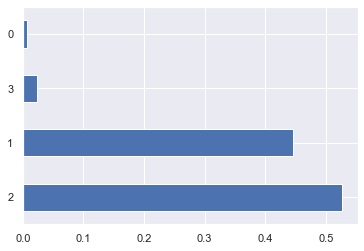

In [66]:
train['FullBath'].value_counts(dropna=False, normalize = True).plot(kind = 'barh');

> __FullBath__, __BsmtHalfBath__ and __BsmtFullBath__ can be treated as discrete variables like __OverallQual__ and __OverallCond__.




#### HalfBath

In [67]:
train['HalfBath'].isnull().sum()

0

In [68]:
test['HalfBath'].isnull().sum()

0

In [69]:
train['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

#### BedroomAbvGr

In [70]:
train['BedroomAbvGr'].isnull().sum()

0

In [71]:
test['BedroomAbvGr'].isnull().sum()

0

In [72]:
train['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

#### KitchenAbvGr

In [73]:
train['KitchenAbvGr'].isnull().sum()

0

In [74]:
train['KitchenAbvGr'].isnull().sum()

0

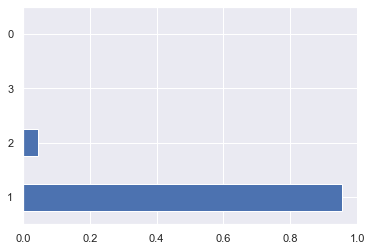

In [76]:
train['KitchenAbvGr'].value_counts(normalize = True).plot(kind = 'barh');

#### TotRmsAbvGrd

In [77]:
train['TotRmsAbvGrd'].isnull().sum()

0

In [78]:
test['TotRmsAbvGrd'].isnull().sum()

0

In [79]:
test['TotRmsAbvGrd'].value_counts()

6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64

In [80]:
test['TotRmsAbvGrd'][:6]

0    5
1    6
2    6
3    7
4    5
5    7
Name: TotRmsAbvGrd, dtype: int64

In [81]:
(train['KitchenAbvGr'] + train['BedroomAbvGr']).head()  # so sum of these 2 columns is not equal to TotRmsAbvGrd

0    4
1    4
2    4
3    4
4    5
dtype: int64

#### Fireplaces

In [82]:
train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [83]:
train['Fireplaces'].isnull().sum()

0

In [84]:
test['Fireplaces'].isnull().sum()

0

> __Fireplaces__, __KitchenAbvGr__, __TotRmsAbvGrd__, __BedroomAbvGr__, __HalfBath__,   __FullBath__, __BsmtHalfBath__ and __BsmtFullBath__ can be treated as discrete variables like __OverallQual__ and __OverallCond__.

#### GarageYrBlt

In [85]:
train['GarageYrBlt'].isnull().sum()

81

In [86]:

test['GarageYrBlt'].isnull().sum()

78

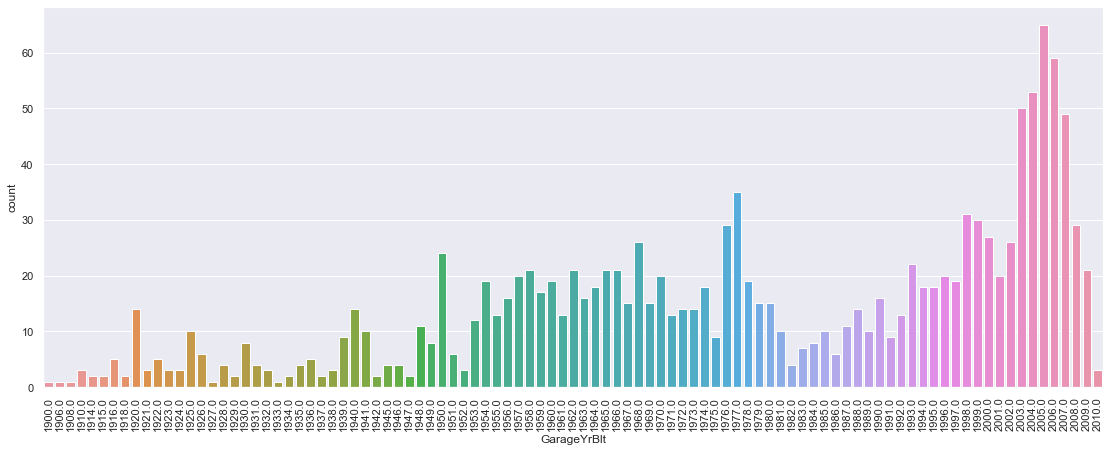

In [87]:
plt.figure(figsize = (19,7));
sns.countplot(data = train, x = 'GarageYrBlt');
plt.xticks(rotation=90);

here year value where NA is there shows that Garage has not been built for that particular house. Also the spike in the number of garages built after 2000 shows that more houses have been built with garage after 2000s.

> Relpace NAs with 0s for this column __GarageYrBlt__.

#### GarageCars

In [88]:
train['GarageCars'].isnull().sum()

0

In [89]:
test['GarageCars'].isnull().sum()

1

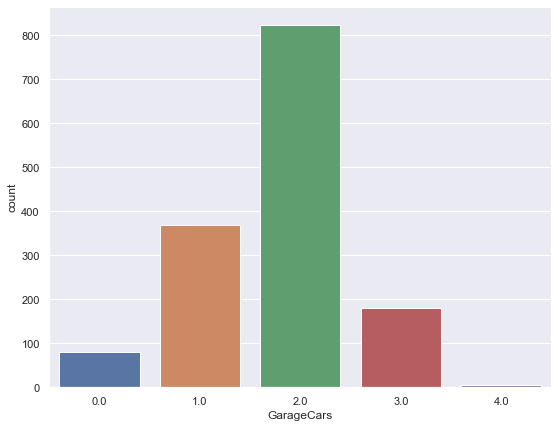

In [90]:
plt.figure(figsize = (9,7));
sns.countplot(data = train, x = 'GarageCars');

We will be taking this as a ordinal categorical discrete value too.

> The null value will be imputed with 0.

#### GarageArea

In [91]:
train['GarageArea'].isnull().sum()

0

In [92]:
test['GarageArea'].isnull().sum()

1

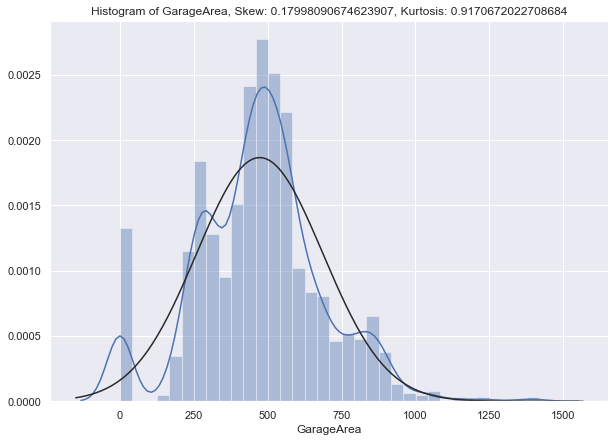

In [93]:
plt.figure(figsize = (10,7));
sns.distplot(train['GarageArea'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('GarageArea', train['GarageArea'].skew(), 
                                                           train['GarageArea'].kurt()));

Some transformation might be needed here to remove the outliers and reduce kurtosis values less than 0.5

#### WoodDeckSF

In [94]:
train['WoodDeckSF'].isnull().sum()

0

In [97]:
test['WoodDeckSF'].isnull().sum()

0

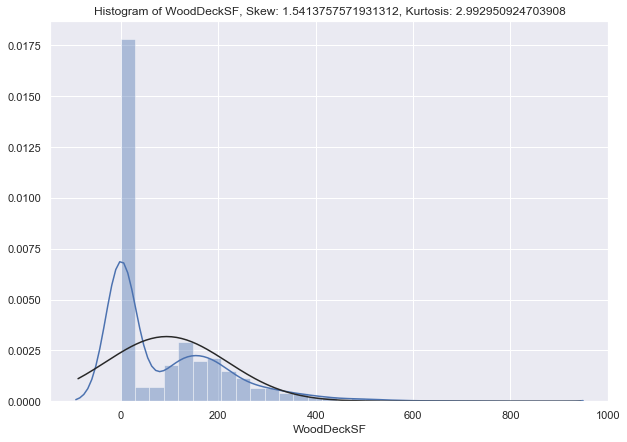

In [98]:
plt.figure(figsize = (10,7));
sns.distplot(train['WoodDeckSF'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('WoodDeckSF', train['WoodDeckSF'].skew(), 
                                                           train['WoodDeckSF'].kurt()));

Most of the values of this are zero which implies most of the house doesnt have WoodDeckSF.

> Has high value of skew and kurtosis. Outlier removal and feature transformation required.

#### OpenPorchSF



In [99]:
train['OpenPorchSF'].isnull().sum()

0

In [100]:
test['OpenPorchSF'].isnull().sum()

0

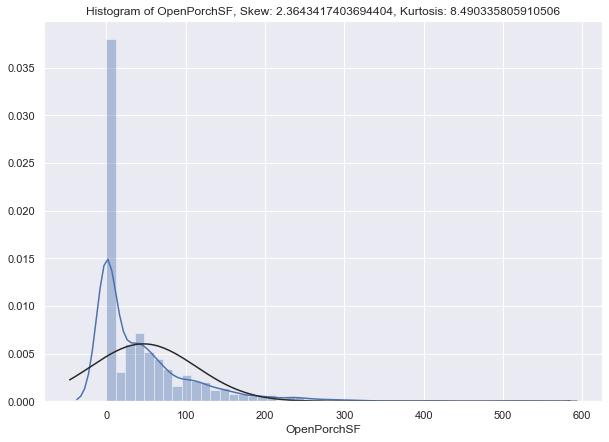

In [101]:
plt.figure(figsize = (10,7));
sns.distplot(train['OpenPorchSF'], fit = norm, kde = True);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('OpenPorchSF', train['OpenPorchSF'].skew(), 
                                                           train['OpenPorchSF'].kurt()));

Again OpenPorchSF has most of its values as zero which means most of the houses do not have OpenPorchSF. 
> Has high value of skew and kurtosis. Outlier removal and feature transformation required.

#### EnclosedPorch

In [102]:
train['EnclosedPorch'].isnull().sum()

0

In [103]:
test['EnclosedPorch'].isnull().sum()

0

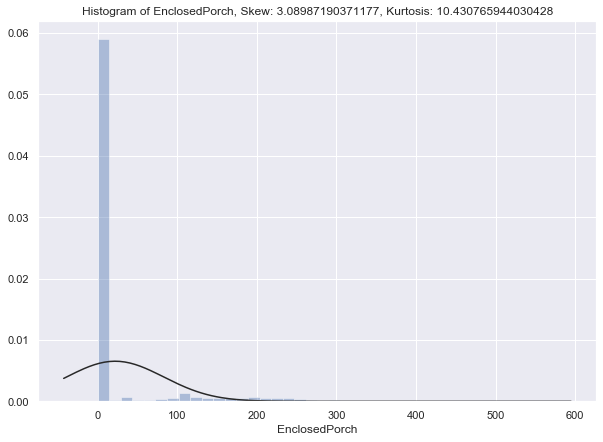

In [104]:
plt.figure(figsize = (10,7));
sns.distplot(train['EnclosedPorch'], fit = norm, kde = False);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('EnclosedPorch', train['EnclosedPorch'].skew(), 
                                                           train['EnclosedPorch'].kurt()));

1st need to check __EnclosedPorch__ and SalePrcie relationship and then based on it if there is aviable relationship do some transformation to make EnclosedPorch closer to normal distribution.

#### 3SsnPorch

In [105]:
train['3SsnPorch'].isnull().sum()

0

In [106]:
test['3SsnPorch'].isnull().sum()

0

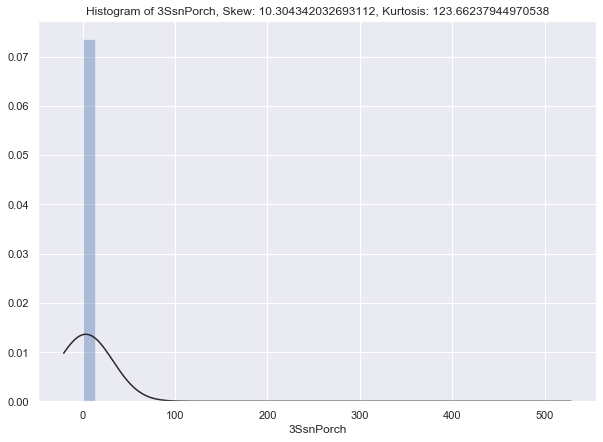

In [107]:
plt.figure(figsize = (10,7));
sns.distplot(train['3SsnPorch'], fit = norm, kde = False);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('3SsnPorch', train['3SsnPorch'].skew(), 
                                                           train['3SsnPorch'].kurt()));

In [108]:
train['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

> Although almost all its values are zero but in bivaraiate analysis find remaining pts relationship with SalePrice.

#### ScreenPorch

In [109]:
train['ScreenPorch'].isnull().sum()

0

In [110]:
test['ScreenPorch'].isnull().sum()

0

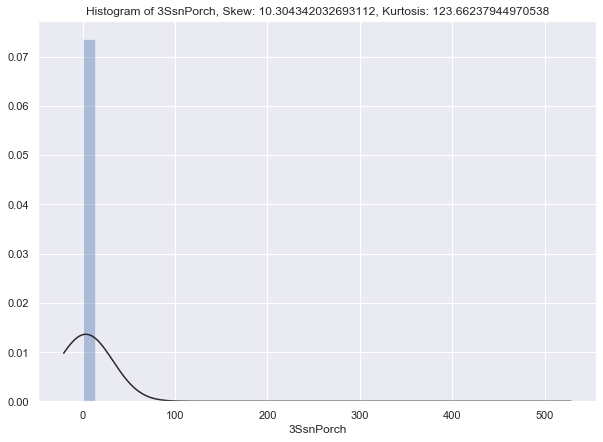

In [112]:
plt.figure(figsize = (10,7));
sns.distplot(train['3SsnPorch'], fit = norm, kde = False);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('3SsnPorch', train['3SsnPorch'].skew(), 
                                                           train['3SsnPorch'].kurt()));

In [114]:
train['ScreenPorch'].value_counts()[:5]

0      1344
192       6
224       5
120       5
189       4
Name: ScreenPorch, dtype: int64

> Although almost all its values are zero but in bivaraiate analysis find remaining pts relationship with SalePrice.

#### PoolArea

In [115]:
train['PoolArea'].isnull().sum()

0

In [116]:
test['PoolArea'].isnull().sum()

0

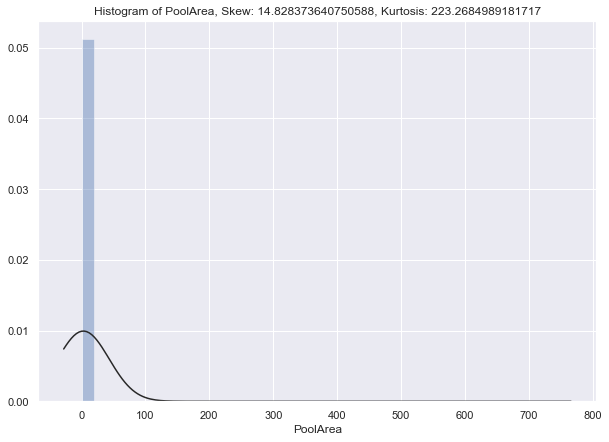

In [117]:
plt.figure(figsize = (10,7));
sns.distplot(train['PoolArea'], fit = norm, kde = False);
plt.title('Histogram of {}, Skew: {}, Kurtosis: {}'.format('PoolArea', train['PoolArea'].skew(), 
                                                           train['PoolArea'].kurt()));

In [118]:
train['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [119]:
train.loc[train['PoolArea']!=0, ['PoolArea', 'SalePrice']].sort_values(by = 'PoolArea')

,PoolArea,SalePrice
1298,480,160000
197,512,235000
1386,519,250000
1182,555,745000
1170,576,171000
810,648,181000
1423,738,274970


Most of the houses do not have Pools  but those who have have huge impact on SalePrice. Check relationship first with SAlePrice in table above.


#### MiscVal

In [120]:
train['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [121]:
train['MiscVal'].isnull().sum()

0

In [122]:
test['MiscVal'].isnull().sum()

0

Those most of the houses do not have miscellaneous features but their presence definately imapcts SalePrice.

#### MoSold

In [123]:
train['MoSold'].isnull().sum()

0

In [124]:
test['MoSold'].isnull().sum()

0

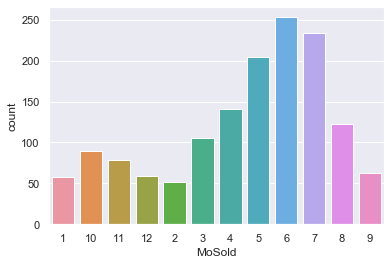

In [125]:
sns.countplot(data= train, x = 'MoSold');

Most of the sales of the houses happened between April to July.

#### YrSold

In [126]:
train['YrSold'].isnull().sum()

0

In [127]:
test['YrSold'].isnull().sum()

0

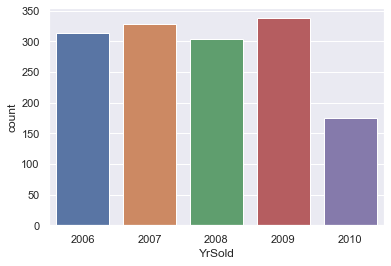

In [128]:
sns.countplot(data= train, x = 'YrSold');

#### Total_bathrooms

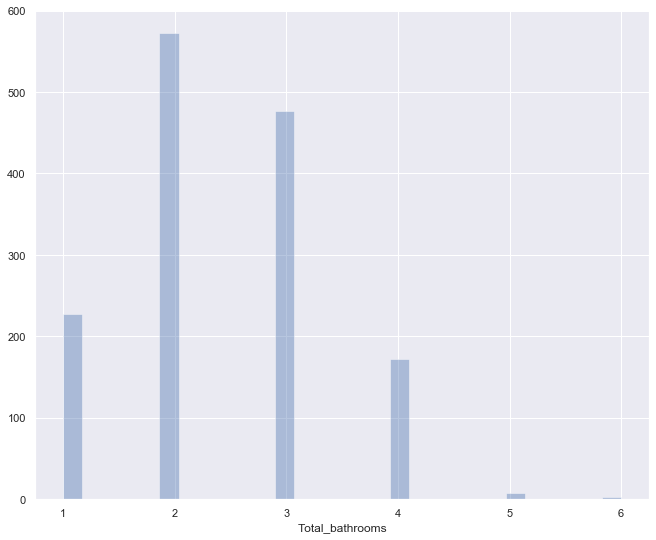

In [129]:
plt.figure(figsize = (11,9));
sns.distplot(train['Total_bathrooms'], kde= False);

## Selecting binary columns

In [130]:
train.filter(like = 'Has', axis = 1).columns

Index(['Has_Garage', 'Has_2ndFlr', 'Has_Pool', 'Has_basement', 'Has_fireplace',
       'Has_wooddeck', 'Has_Open_Porch', 'Has_EnclosedPorch', 'Has_3SsnPorch',
       'Has_ScreenPorch'],
      dtype='object')

In [131]:
for col in train.filter(like = 'Has', axis = 1).columns:
    print(col)
    print(train[col].value_counts())
    print("-------------------")

Has_Garage
1    1379
0      81
Name: Has_Garage, dtype: int64
-------------------
Has_2ndFlr
0    829
1    631
Name: Has_2ndFlr, dtype: int64
-------------------
Has_Pool
0    1453
1       7
Name: Has_Pool, dtype: int64
-------------------
Has_basement
1    1423
0      37
Name: Has_basement, dtype: int64
-------------------
Has_fireplace
1    770
0    690
Name: Has_fireplace, dtype: int64
-------------------
Has_wooddeck
0    761
1    699
Name: Has_wooddeck, dtype: int64
-------------------
Has_Open_Porch
1    804
0    656
Name: Has_Open_Porch, dtype: int64
-------------------
Has_EnclosedPorch
0    1252
1     208
Name: Has_EnclosedPorch, dtype: int64
-------------------
Has_3SsnPorch
0    1436
1      24
Name: Has_3SsnPorch, dtype: int64
-------------------
Has_ScreenPorch
0    1344
1     116
Name: Has_ScreenPorch, dtype: int64
-------------------


## 2.2 Univariate analysis of categorical variables

In [132]:
object_category_columns = ['category', 'object']
train.select_dtypes(include = object_category_columns).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [133]:
global list_of_object__columns_with_null_values
list_of_object__columns_with_null_values = []
def univariate_category_analysis(train, col):
    print('Number of null values in {} is: {}'.format(col, train[col].isnull().sum()))
    if (train[col].isnull().sum()):
        list_of_object__columns_with_null_values.append(col)
    (train[col].value_counts(dropna = False, normalize = True)*100).plot(kind = 'barh');
    plt.xlabel('Count %ge');
    plt.ylabel(col);
    plt.show();

#### MSZoning

Number of null values in MSZoning is: 0


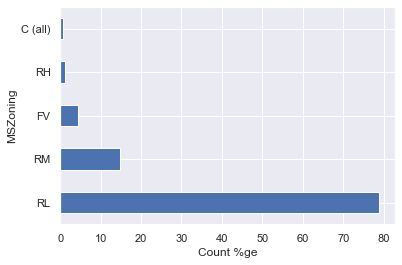

In [134]:
univariate_category_analysis(train, 'MSZoning')

#### Street

Number of null values in Street is: 0


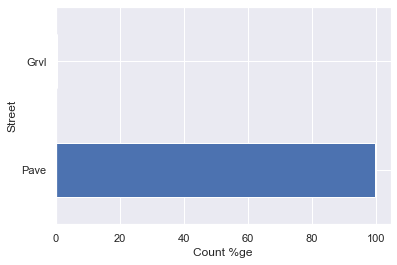

In [135]:
univariate_category_analysis(train, 'Street')

#### Alley

Number of null values in Alley is: 1369


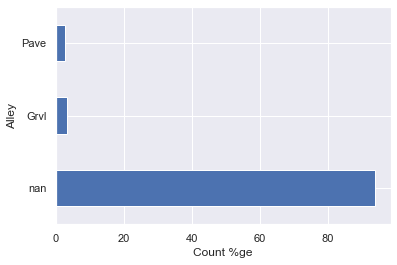

In [136]:
univariate_category_analysis(train, 'Alley')

#### LotShape

Number of null values in LotShape is: 0


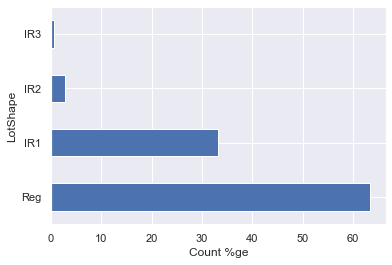

In [137]:
univariate_category_analysis(train, 'LotShape')

#### Utilities

Number of null values in Utilities is: 0


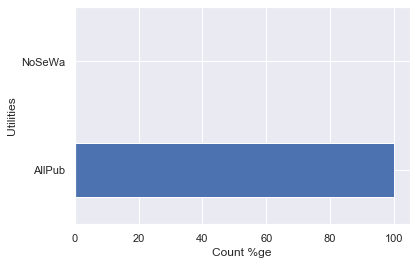

In [139]:
univariate_category_analysis(train, 'Utilities')

#### LotConfig

Number of null values in LotConfig is: 0


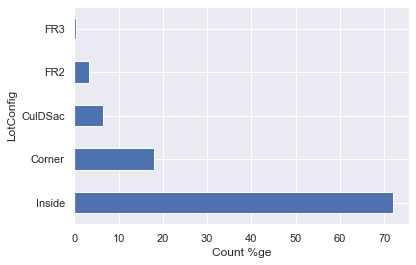

In [140]:
univariate_category_analysis(train, 'LotConfig')

#### LandSlope

Number of null values in LandSlope is: 0


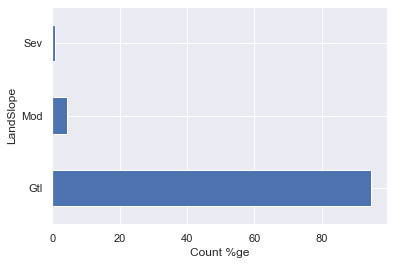

In [142]:
univariate_category_analysis(train, 'LandSlope')

#### Neighborhood

Number of null values in Neighborhood is: 0


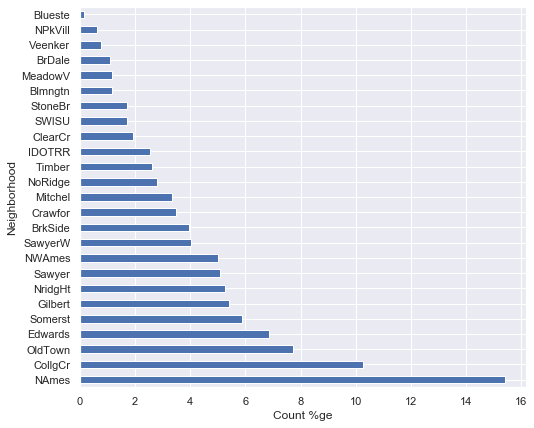

In [143]:
plt.figure(figsize=(8,7))
univariate_category_analysis(train, 'Neighborhood')

#### Condition1

Number of null values in Condition1 is: 0


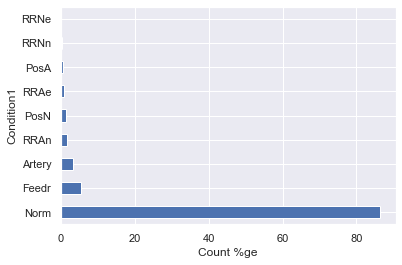

In [144]:
univariate_category_analysis(train, 'Condition1')

#### Condition2

Number of null values in Condition2 is: 0


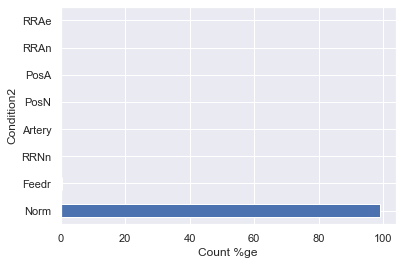

In [145]:
univariate_category_analysis(train, 'Condition2')

#### BldgType

Number of null values in BldgType is: 0


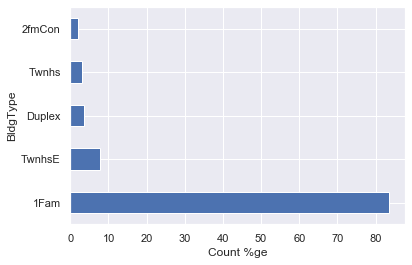

In [146]:
univariate_category_analysis(train, 'BldgType')

#### HouseStyle

Number of null values in HouseStyle is: 0


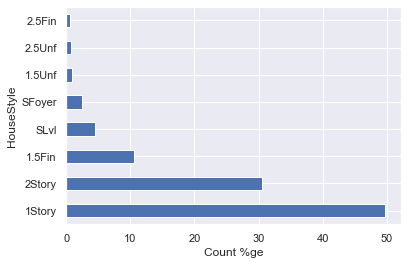

In [147]:
univariate_category_analysis(train, 'HouseStyle')

#### OverallQual

Number of null values in OverallQual is: 0


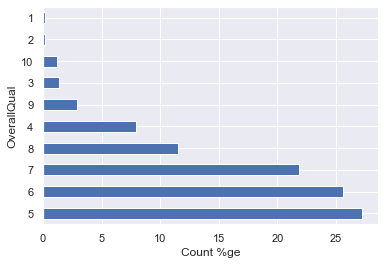

In [148]:
univariate_category_analysis(train, 'OverallQual')

#### OverallCond

Number of null values in OverallCond is: 0


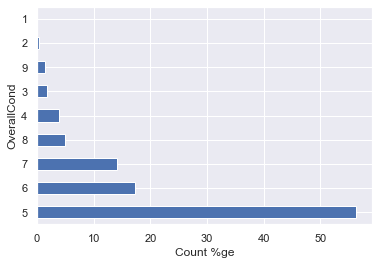

In [149]:
univariate_category_analysis(train, 'OverallCond')

#### RoofStyle

Number of null values in RoofStyle is: 0


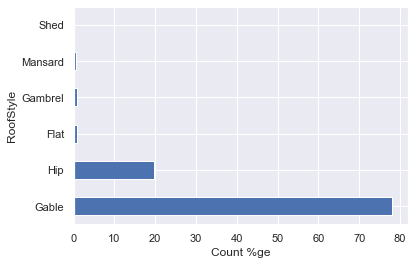

In [150]:
univariate_category_analysis(train, 'RoofStyle')

#### RoofMatl

Number of null values in RoofMatl is: 0


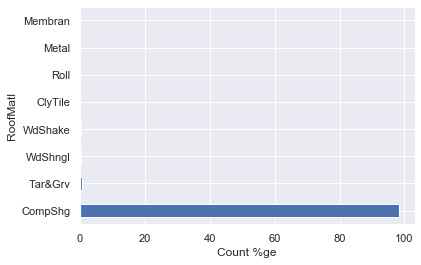

In [151]:
univariate_category_analysis(train, 'RoofMatl')

#### Exterior1st

Number of null values in Exterior1st is: 0


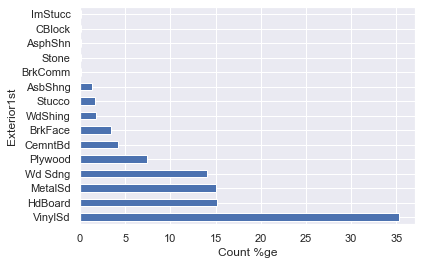

In [152]:
univariate_category_analysis(train, 'Exterior1st')

#### Exterior2nd

Number of null values in Exterior2nd is: 0


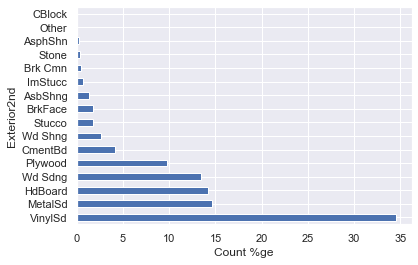

In [153]:
univariate_category_analysis(train, 'Exterior2nd')

#### MasVnrType

Number of null values in MasVnrType is: 8


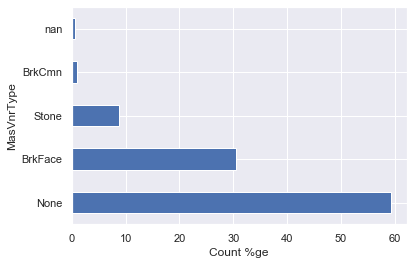

In [154]:
univariate_category_analysis(train, 'MasVnrType')

#### ExterQual

Number of null values in ExterQual is: 0


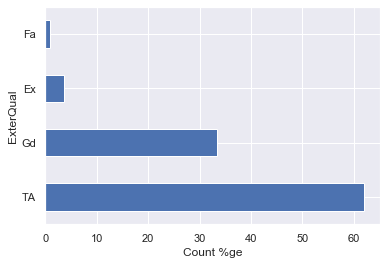

In [155]:
univariate_category_analysis(train, 'ExterQual')

#### ExterCond

Number of null values in ExterCond is: 0


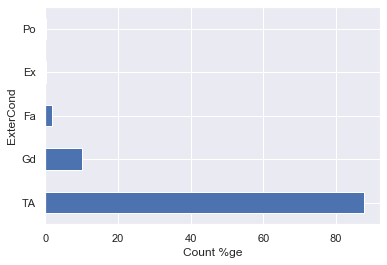

In [157]:
univariate_category_analysis(train, 'ExterCond')

#### Foundation

Number of null values in Foundation is: 0


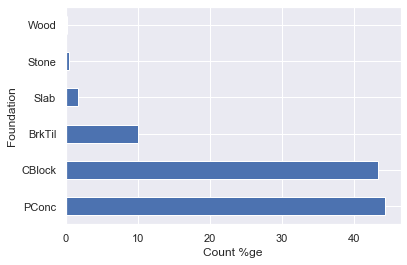

In [158]:
univariate_category_analysis(train, 'Foundation')

#### BsmtQual

Number of null values in BsmtQual is: 37


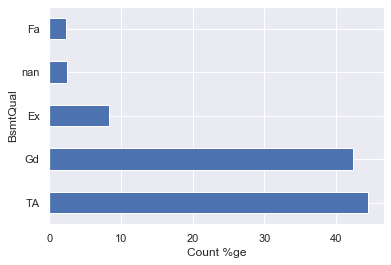

In [159]:
univariate_category_analysis(train, 'BsmtQual')

#### BsmtCond

Number of null values in BsmtCond is: 37


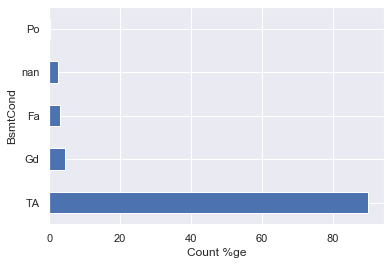

In [160]:
univariate_category_analysis(train, 'BsmtCond')

#### BsmtExposure

Number of null values in BsmtExposure is: 38


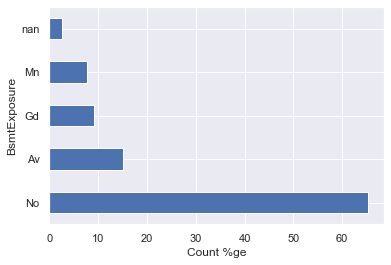

In [161]:
univariate_category_analysis(train, 'BsmtExposure')

#### BsmtFinType1

Number of null values in BsmtFinType1 is: 37


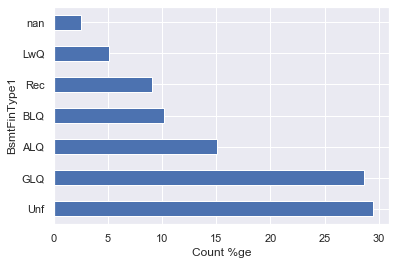

In [162]:
univariate_category_analysis(train, 'BsmtFinType1')

#### BsmtFinType2

Number of null values in BsmtFinType2 is: 38


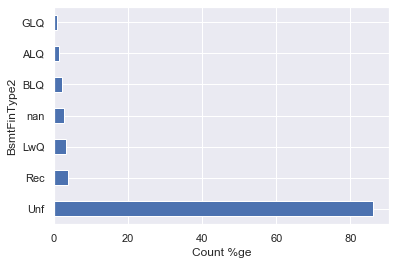

In [163]:
univariate_category_analysis(train, 'BsmtFinType2')

#### Heating

Number of null values in Heating is: 0


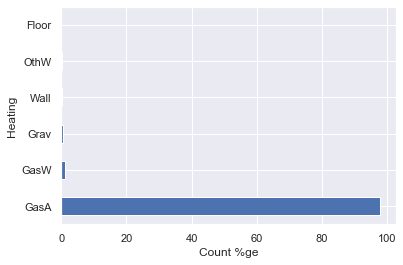

In [146]:
univariate_category_analysis(train, 'Heating')

#### HeatingQC

Number of null values in HeatingQC is: 0


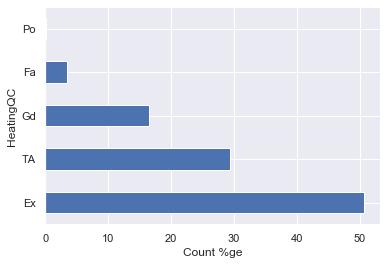

In [164]:
univariate_category_analysis(train, 'HeatingQC')

#### CentralAir

Number of null values in CentralAir is: 0


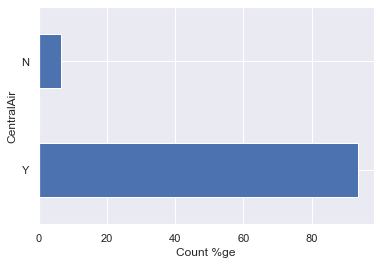

In [166]:
univariate_category_analysis(train, 'CentralAir')

#### Electrical

Number of null values in Electrical is: 1


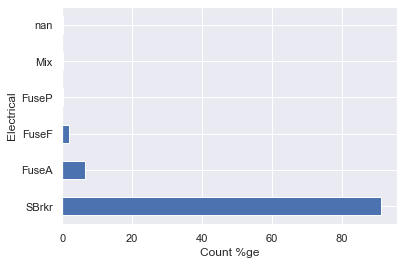

In [167]:
univariate_category_analysis(train, 'Electrical')

#### KitchenQual

Number of null values in KitchenQual is: 0


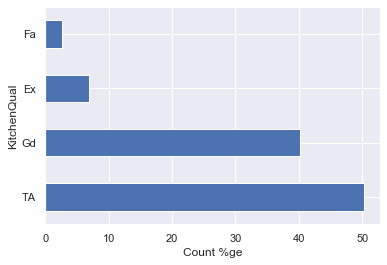

In [168]:
univariate_category_analysis(train, 'KitchenQual')

#### Functional

Number of null values in Functional is: 0


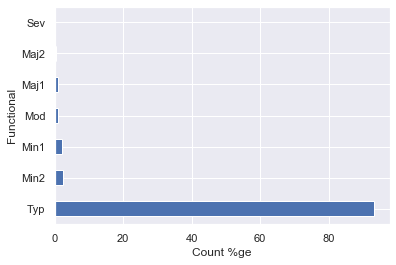

In [169]:
univariate_category_analysis(train, 'Functional')

#### FireplaceQu

Number of null values in FireplaceQu is: 690


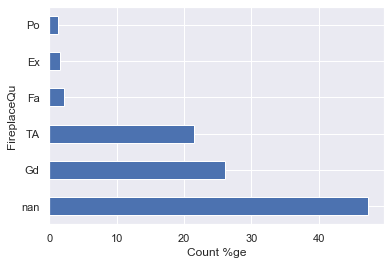

In [170]:
univariate_category_analysis(train, 'FireplaceQu')

#### GarageType

Number of null values in GarageType is: 81


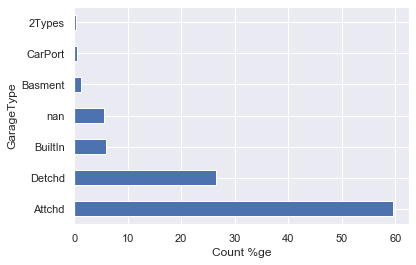

In [171]:
univariate_category_analysis(train, 'GarageType')

#### GarageFinish

Number of null values in GarageFinish is: 81


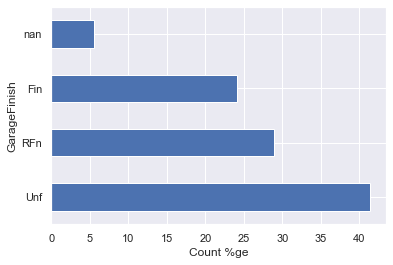

In [172]:
univariate_category_analysis(train, 'GarageFinish')

#### GarageQual

Number of null values in GarageQual is: 81


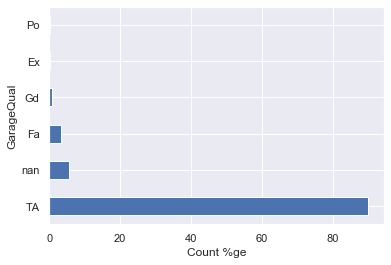

In [173]:
univariate_category_analysis(train, 'GarageQual')

#### GarageCond

Number of null values in GarageCond is: 81


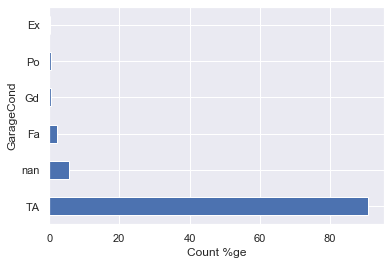

In [174]:
univariate_category_analysis(train, 'GarageCond')

#### PavedDrive

Number of null values in PavedDrive is: 0


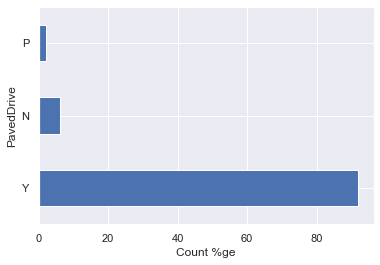

In [157]:
univariate_category_analysis(train, 'PavedDrive')

#### PoolQC

Number of null values in PoolQC is: 1453


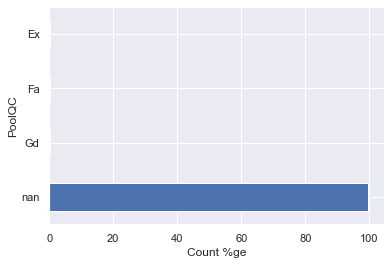

In [158]:
univariate_category_analysis(train, 'PoolQC')

#### Fence

Number of null values in Fence is: 1179


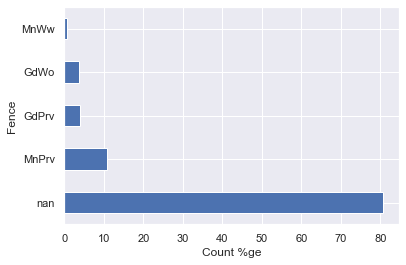

In [175]:
univariate_category_analysis(train, 'Fence')

#### MiscFeature

Number of null values in MiscFeature is: 1406


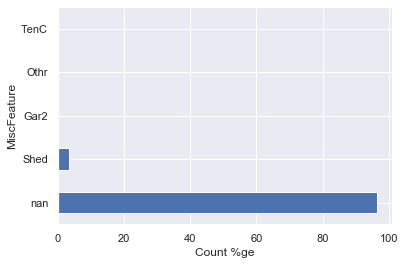

In [176]:
univariate_category_analysis(train, 'MiscFeature')

#### SaleType

Number of null values in SaleType is: 0


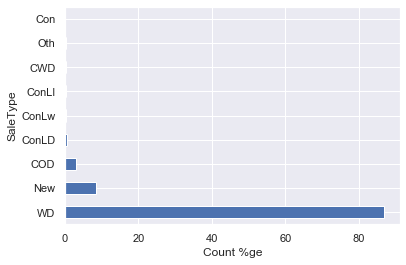

In [177]:
univariate_category_analysis(train, 'SaleType')

#### SaleCondition

Number of null values in SaleCondition is: 0


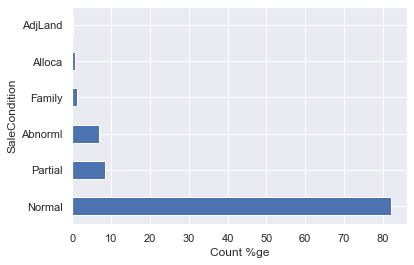

In [162]:
univariate_category_analysis(train, 'SaleCondition')

### 2.b Data wrangling to do after univariate categorical analysis

In [163]:
list_of_object__columns_with_null_values

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [164]:
len(list_of_object__columns_with_null_values)

16

## 3. Data Wrangling after univariate analysis



rbinding train and test data

In [165]:
data = pd.concat([train.drop(columns='SalePrice'), test], axis = 0)
data.shape

(2919, 95)

Dropping column BsmtFinSF2

In [166]:
data.drop(columns = ['Id'], inplace = True)

In [167]:
data.isnull().sum()[data.isnull().sum()!=0]

MSZoning                4
LotFrontage           486
Alley                2721
Utilities               2
Exterior1st             1
Exterior2nd             1
MasVnrType             24
MasVnrArea             23
BsmtQual               81
BsmtCond               82
BsmtExposure           82
BsmtFinType1           79
BsmtFinSF1              1
BsmtFinType2           80
BsmtFinSF2              1
BsmtUnfSF               1
TotalBsmtSF             1
Electrical              1
BsmtFullBath            2
BsmtHalfBath            2
KitchenQual             1
Functional              2
FireplaceQu          1420
GarageType            157
GarageYrBlt           159
GarageFinish          159
GarageCars              1
GarageArea              1
GarageQual            159
GarageCond            159
PoolQC               2909
Fence                2348
MiscFeature          2814
SaleType                1
Total_bathrooms         2
Total_basement_SF       1
Total_sqr_footage       1
dtype: int64

Filling NA values of numerical columns

In [168]:
for col in ['BsmtHalfBath','BsmtFullBath']:
    data[col] = data[col].fillna(data[col].value_counts().idxmax())

In [169]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [170]:
for col in ['LotFrontage', 'MasVnrArea']:
    data[col] = data[col].fillna(data[col].median())

In [171]:
for col in ['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']:
    data[col] = data[col].fillna(data[col].median())

Filling NA values of object/categorical columns

In [172]:
for col in ['MasVnrType', 'Electrical']:
    data[col] = data[col].fillna(data[col].value_counts().idxmax())
    
for col in ['Alley', 'GarageType', 'GarageFinish', 'BsmtQual', 'BsmtCond', 'BsmtExposure',  'BsmtFinType1', 'PoolQC',
            'BsmtFinType2', 'FireplaceQu', 'GarageQual',  'GarageCond','Fence', 'MiscFeature']:
    data[col] = data[col].fillna('None')
    
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].value_counts().index[0])
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].value_counts().index[0])
data['GarageCond'] = data['GarageCond'].fillna('None')
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].value_counts().index[0])
data['Functional'] = data['Functional'].fillna(data['Functional'].value_counts().index[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].value_counts().index[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].value_counts().index[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].value_counts().index[0])

In [173]:
for col in data.isnull().sum()[data.isnull().sum()!=0].index:
    data[col] = data[col].median()

In [174]:
data.isnull().sum()[data.isnull().sum()!=0]

Series([], dtype: int64)

So NA values of all columns are filled.

#### Dealing with all object/category type columns  

Converting object columns to ordinal category type

In [175]:
cat_type = CategoricalDtype(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
for col in ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual']:
    data[col] = data[col].astype(cat_type)
    
cat_type = CategoricalDtype(['IR3', 'IR2', 'IR1', 'Reg'], ordered=True)
data['LotShape'] = data['LotShape'].astype(cat_type)

cat_type = CategoricalDtype(['None', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
data['PoolQC'] = data['PoolQC'].astype(cat_type)

cat_type = CategoricalDtype(['None', 'No', 'Mn', 'Av', 'Gd'], ordered=True)
data['BsmtExposure'] = data['BsmtExposure'].astype(cat_type)

cat_type = CategoricalDtype(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)
for col in ['BsmtFinType2', 'BsmtFinType1']:
    data[col] = data[col].astype(cat_type)
    
cat_type = CategoricalDtype(['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], ordered=True)
data['Fence'] = data['Fence'].astype(cat_type)

cat_type = CategoricalDtype(['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
data['KitchenQual'] = data['KitchenQual'].astype(cat_type)
data['HeatingQC'] = data['HeatingQC'].astype(cat_type)

cat_type = CategoricalDtype(['Low', 'HLS', 'Bnk', 'Lvl'], ordered=True)
data['LandContour'] = data['LandContour'].astype(cat_type)

cat_type = CategoricalDtype(['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], ordered=True)
data['Utilities'] = data['Utilities'].astype(cat_type)

cat_type = CategoricalDtype(['Sev', 'Mod', 'Gtl'], ordered=True)
data['LandSlope'] = data['LandSlope'].astype(cat_type)

cat_type = CategoricalDtype(['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
for col in ['ExterQual', 'ExterCond']:
    data[col] = data[col].astype(cat_type)
    
cat_type = CategoricalDtype(['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],ordered=True)
data['Functional'] = data['Functional'].astype(cat_type)

cat_type = CategoricalDtype(['None', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', 'Attchd', '2Types'],ordered=True)
data['GarageType'] = data['GarageType'].astype(cat_type)

cat_type = CategoricalDtype(['None', 'Unf', 'RFn', 'Fin'],ordered=True)
data['GarageFinish'] = data['GarageFinish'].astype(cat_type)

cat_type = CategoricalDtype(['N', 'P', 'Y'],ordered=True)
data['PavedDrive'] = data['PavedDrive'].astype(cat_type)

In [176]:
data.shape

(2919, 94)

Create datas for train and test set make sure to use the `copy()` function

In [177]:
X_train = data.iloc[:len(train),:].copy()
X_test = data.iloc[len(train):,:].copy()
X_train = pd.concat([X_train,train['SalePrice']], axis = 1)

In [178]:
X_train.shape

(1460, 95)

In [179]:
X_test.shape

(1459, 94)

## 3. Bivariate Analysis

Here 1st we will check which of the categorical or continuous variables will have an impact on the target variable. Then we will retain only those columns having an impact on the target variable.

Here as the target variable is continuous so we can do test for dependance for the categorical/continuous predictor  variables onto the target variable  and directly remove the columns which do not contribute to the target varaiable or the target variable are not dependant on it.




### Categorical and continuous (target) variable

Doing ANOVA test to find the dependency of independant categorical varaiable on the dependant varaible i.e, SalePrice. If no dependancy then we will drop the categorical variable.

In [180]:
global categ_columns_with_high_association, categ_columns_with_low_association
categ_columns_with_high_association = []
categ_columns_with_low_association = []
def perform_anova_and_its_results(categ_col, num_col='SalePrice', df = X_train):
    df_sst = len(df[num_col])-1
    df_ssb = df[categ_col].nunique() - 1
    df_ssw = df_sst - df_ssb
    F_critical = f.ppf(0.95, df_ssb, df_ssw)
    print("F_Critical: {0:.3f}".format(F_critical))
    results = ols('{} ~{}'.format(num_col, categ_col), data = train).fit()
    aov_table = sm.stats.anova_lm(results, typ = 1)  
    F_stat = aov_table.loc[categ_col, 'F']
    print("F_statistic: {0:.3f}".format(F_stat))
    if (F_stat > F_critical):
        print("F-statistic is more than F-critical")
        print("There is an association between {} and {}".format(categ_col,num_col))
        categ_columns_with_high_association.append(categ_col)
    else:
        print("F-statistic is less than F-critical")
        print("There is no association between {} and {}".format(categ_col,num_col))
        categ_columns_with_low_association.append(categ_col)
    print('-'*30)

In [181]:
for col in train.select_dtypes(include = ['category', 'object']).columns.to_list():
    perform_anova_and_its_results(col)

F_Critical: 2.378
F_statistic: 43.840
F-statistic is more than F-critical
There is an association between MSZoning and SalePrice
------------------------------
F_Critical: 3.848
F_statistic: 2.459
F-statistic is less than F-critical
There is no association between Street and SalePrice
------------------------------
F_Critical: 3.002
F_statistic: 35.562
F-statistic is more than F-critical
There is an association between Alley and SalePrice
------------------------------
F_Critical: 2.611
F_statistic: 40.133
F-statistic is more than F-critical
There is an association between LotShape and SalePrice
------------------------------
F_Critical: 2.611
F_statistic: 12.850
F-statistic is more than F-critical
There is an association between LandContour and SalePrice
------------------------------
F_Critical: 3.848
F_statistic: 0.299
F-statistic is less than F-critical
There is no association between Utilities and SalePrice
------------------------------
F_Critical: 2.378
F_statistic: 7.810
F-stat

Doing ANOVA test to find the dependency of independant bianry varaiable on the dependant varaible i.e, SalePrice. If no dependancy then we will drop the binary variable.

In [182]:
for col in train.filter(regex = '^Has', axis = 1).columns:
    perform_anova_and_its_results(col)

F_Critical: 3.848
F_statistic: 86.638
F-statistic is more than F-critical
There is an association between Has_Garage and SalePrice
------------------------------
F_Critical: 3.848
F_statistic: 28.161
F-statistic is more than F-critical
There is an association between Has_2ndFlr and SalePrice
------------------------------
F_Critical: 3.848
F_statistic: 12.916
F-statistic is more than F-critical
There is an association between Has_Pool and SalePrice
------------------------------
F_Critical: 3.848
F_statistic: 34.869
F-statistic is more than F-critical
There is an association between Has_basement and SalePrice
------------------------------
F_Critical: 3.848
F_statistic: 417.717
F-statistic is more than F-critical
There is an association between Has_fireplace and SalePrice
------------------------------
F_Critical: 3.848
F_statistic: 141.741
F-statistic is more than F-critical
There is an association between Has_wooddeck and SalePrice
------------------------------
F_Critical: 3.848
F_s

In [183]:
categ_columns_with_low_association

['Street', 'Utilities', 'LandSlope', 'PoolQC', 'MiscFeature', 'Has_3SsnPorch']

Based on ANOVA test its found that the following columns have no association or not having any dependancy with the target variable __SalePrice__. So dropping these columns from the X_train and X_test dataframes.

In [184]:
X_train.drop(columns = categ_columns_with_low_association, inplace = True)
X_test.drop(columns = categ_columns_with_low_association, inplace = True)

In [185]:
X_train.shape

(1460, 89)

In [186]:
del(categ_columns_with_high_association, categ_columns_with_low_association)

Converting the ordinal category columns into the ordinal encoded number format for finding the correlation with the continuous varaible.

In [187]:
for col in X_train.select_dtypes(include='category').columns:
    X_train[col] = X_train[col].cat.codes

### Continuous and continuous (target) variable

In [188]:
numerical_columns = X_train.select_dtypes(include = 'number').columns.to_list()

In [189]:
numerical_columns.remove('SalePrice')

In [190]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Yrs_since_remodel',
 'House_Qual',
 'Total_bathrooms',
 'Total_basement_SF',
 'Total_sqr_footage',
 'Has_Garage',
 'Has_2ndFlr',
 'Has_Pool',
 'Has_basement',
 'Has_fireplace',
 'Has_wooddeck',
 

In [191]:
len(numerical_columns)

68

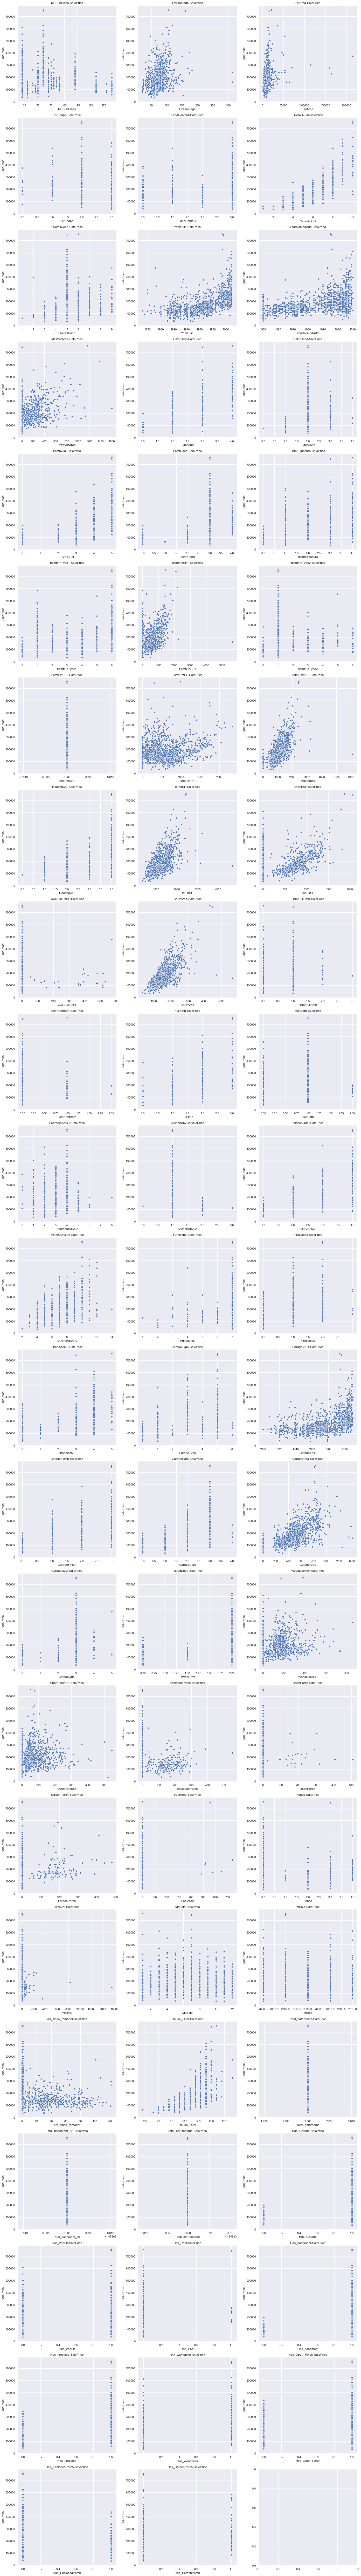

In [192]:
nrows = 23
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6.5,nrows*6))
axes_list = [item for sublist in axes for item in sublist]
for col in numerical_columns:
    ax = axes_list.pop(0)
    sns.scatterplot(data = X_train, x = col, y = 'SalePrice', ax=ax)
    ax.set_title("{}-SalePrice".format(col))
    
plt.tight_layout()
plt.show()

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

1. Category and category analysis

First

In [193]:
def cramers_v(a,b):
    crosstab = pd.crosstab(a,b)
    chi2 = chi2_contingency(crosstab)[0]  # chi-squared value
    n = crosstab.sum().sum()
    phi2 = chi2/n
    r, k = crosstab.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))))


def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :return: float
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = stats.entropy(p_x)
    if s_x == 0:
        return(1)
    else:
        return((s_x - s_xy)/s_x)

In [194]:
categ_cols = X_train.select_dtypes(include = ['object', 'category']).columns
categ_cols

Index(['MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [195]:
len(categ_cols)

20

In [196]:
dependant_category_cols = []
independant_category_cols = []
def chi_square_test(a,b, df = X_train):
    # a and b are the column names of dataframe - pandas series
    two_way_table = pd.crosstab(X_train[a],X_train[b])
    p_value = chi2_contingency(two_way_table)[1]
    if (p_value < 0.05):
#         print("Null hypothesis is rejected. The variables {} and {} are dependent.".format(a,b))
        dependant_category_cols.append((a,b))
    else:
        independant_category_cols.append((a,b))
#         print("The variables {} and {} are independent.".format(a,b))

In [197]:
t = categ_cols.to_list()
for col1 in t:
    for col2 in t:
        if (col1 != col2):
            chi_square_test(col1, col2)

In [198]:
len(independant_category_cols)

96

In [199]:
dependant_col_df = pd.DataFrame(dependant_category_cols, columns =['col1', 'col2']) 
dependant_col_df.head()

,col1,col2
0,MSZoning,Alley
1,MSZoning,LotConfig
2,MSZoning,Neighborhood
3,MSZoning,Condition1
4,MSZoning,Condition2


In [200]:
dependant_col_df.shape

(284, 2)

In [201]:
del(dependant_category_cols)

Bivariate analysis of MSZoning to the rest of nominal objects

In [204]:
categ_cols

Index(['MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [205]:
len(categ_cols)

20

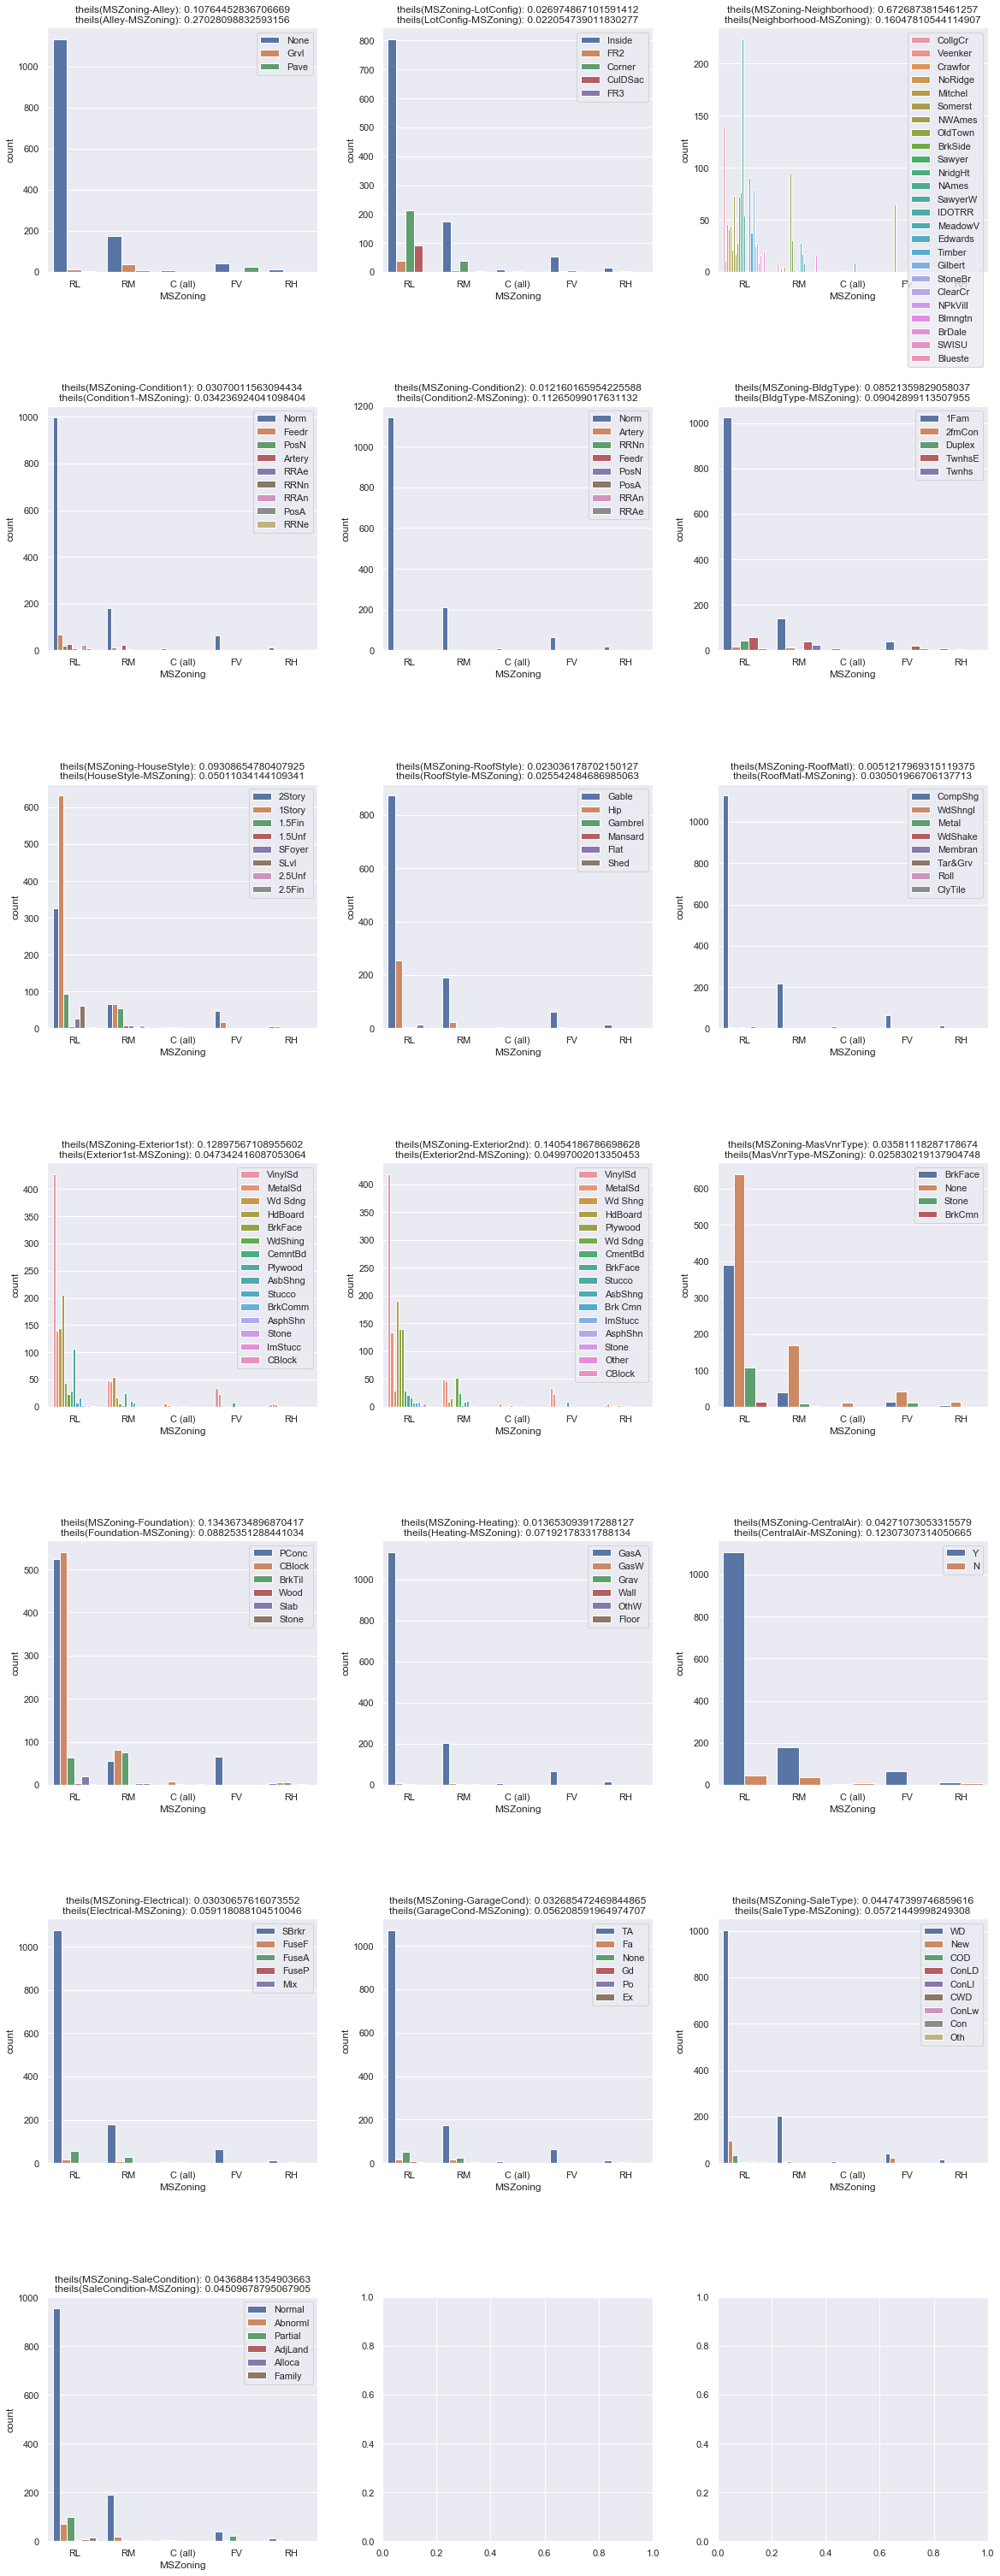

In [206]:
ncols = 3
nrows = 7
fig, axes = plt.subplots(nrows,ncols, figsize=(ncols*5.5,nrows*6))
axes_list = [item for sublist in axes for item in sublist]
for col in categ_cols[categ_cols!='MSZoning']:
    ax = axes_list.pop(0)  # Take the first axes of the axes_list
    sns.countplot(data=  X_train, x = 'MSZoning', hue = col, ax = ax);
    title = ("theils(MSZoning-{}): {}".format(col, theils_u(X_train['MSZoning'], train[col])) + "\n" 
             + "theils({}-MSZoning): {}".format(col, theils_u(train[col], X_train['MSZoning'])))  
    ax.set_title(title)
    ax.legend(loc='upper right')


plt.tight_layout()
plt.show()

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

From the above diagram, it can be seen that most of the sales of all categories happened of the RL MSZoning.

***
Important points:
- To see the valid scoring values to be used in cross validation: [check this link](https://scikit-learn.org/stable/modules/model_evaluation.html)
- And to see the valid metrics that can be used here use the following code:
```
import sklearn
sorted(sklearn.metrics.SCORERS.keys())
```